In [1]:
import pandas as pd
import os
import xlrd
import FINE as fn
import numpy as np
import os
import pytest
import xarray as xr
import json
import geopandas as gpd

from FINE.IOManagement import dictIO
import FINE.IOManagement.xarray_io as xrio 

import FINE.spagat.dataset as spd
import FINE.spagat.grouping as spg
import FINE.spagat.representation as spr 

In [2]:
def getData():
    inputDataPath = r'C:\Users\s.patil\Documents\code\fine\examples\Multi-regional_Energy_System_Workflow\InputData'
    data = {}

    # Onshore data
    capacityMax = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'Wind', 'maxCapacityOnshore_GW_el.xlsx'),
                                index_col=0, squeeze=True)
    operationRateMax = pd.read_excel(
        os.path.join(inputDataPath, 'SpatialData', 'Wind', 'maxOperationRateOnshore_el.xlsx'),
                                                  header = 0, index_col = 0)

    data.update({'Wind (onshore), capacityMax': capacityMax})
    data.update({'Wind (onshore), operationRateMax': operationRateMax})

    # Offshore data
    capacityMax = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'Wind', 'maxCapacityOffshore_GW_el.xlsx'),
                                index_col=0, squeeze=True)
    operationRateMax = pd.read_excel(
        os.path.join(inputDataPath, 'SpatialData', 'Wind', 'maxOperationRateOffshore_el.xlsx'),
                                                  header = 0, index_col = 0)

    data.update({'Wind (offshore), capacityMax': capacityMax})
    data.update({'Wind (offshore), operationRateMax': operationRateMax})

    # PV data
    capacityMax = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'PV', 'maxCapacityPV_GW_el.xlsx'),
                                index_col=0, squeeze=True)
    operationRateMax = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'PV', 'maxOperationRatePV_el.xlsx'),
                                                  header = 0, index_col = 0)

    data.update({'PV, capacityMax': capacityMax})
    data.update({'PV, operationRateMax': operationRateMax})

    # Run of river data
    capacityFix = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'HydroPower', 'fixCapacityROR_GW_el.xlsx'),
                                index_col=0, squeeze=True)
    operationRateFix = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'HydroPower',
                                                  'fixOperationRateROR.xlsx'),
                                                  header = 0, index_col = 0)

    data.update({'Existing run-of-river plants, capacityFix': capacityFix})
    data.update({'Existing run-of-river plants, operationRateFix': operationRateFix})

    # Biogas data
    operationRateMax = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'Biogas',
                                                  'biogasPotential_GWh_biogas.xlsx'),
                                                  header = 0, index_col = 0)

    data.update({'Biogas, operationRateMax': operationRateMax})

    biogasCommodityCostTimeSeries = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'Biogas',
                                                  'biogasPriceTimeSeries_MrdEuro_GWh.xlsx'),
                                                  header = 0, index_col = 0)

    data.update({'Biogas, commodityCostTimeSeries': biogasCommodityCostTimeSeries})

    # Natural gas data
    naturalGasCommodityCostTimeSeries = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'NaturalGas',
                                                  'naturalGasPriceTimeSeries_MrdEuro_GWh.xlsx'),
                                                  header = 0, index_col = 0)

    data.update({'Natural Gas, commodityCostTimeSeries': naturalGasCommodityCostTimeSeries})

    # Natural gas plant data
    capacityMax = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'NaturalGasPlants',
                                             'existingCombinedCycleGasTurbinePlantsCapacity_GW_el.xlsx'),
                                index_col=0, squeeze=True)

    data.update({'Existing CCGT plants (methane), capacityMax': capacityMax})

    # Hydrogen salt cavern data
    capacityMax = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'GeologicalStorage',
                                             'existingSaltCavernsCapacity_GWh_methane.xlsx'),
                                index_col=0, squeeze=True) * 3 / 10

    data.update({'Salt caverns (hydrogen), capacityMax': capacityMax})

    # Methane salt cavern data
    capacityMax = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'GeologicalStorage',
                                             'existingSaltCavernsCapacity_GWh_methane.xlsx'),
                                index_col=0, squeeze=True)

    data.update({'Salt caverns (methane), capacityMax': capacityMax})

    # Pumped hydro storage data
    capacityFix = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'HydroPower',
                                             'fixCapacityPHS_storage_GWh_energyPHS.xlsx'),
                                index_col=0, squeeze=True)

    data.update({'Pumped hydro storage, capacityFix': capacityFix})

    # AC cables data
    capacityFix = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'ElectricGrid',
                                             'ACcableExistingCapacity_GW_el.xlsx'),
                                index_col=0, header=0)

    data.update({'AC cables, capacityFix': capacityFix})

    reactances = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'ElectricGrid',
                                            'ACcableReactance.xlsx'),
                                index_col=0, header=0)

    data.update({'AC cables, reactances': reactances})

    # DC cables data
    capacityFix = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'ElectricGrid',
                                             'DCcableExistingCapacity_GW_el.xlsx'),
                                index_col=0, header=0)
    distances = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'ElectricGrid',
                                           'DCcableLength_km.xlsx'),
                              index_col=0, header=0)
    losses = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'ElectricGrid',
                                        'DCcableLosses.xlsx'),
                           index_col=0, header=0)

    data.update({'DC cables, capacityFix': capacityFix})
    data.update({'DC cables, distances': distances})
    data.update({'DC cables, losses': losses})

    # Pipelines data
    eligibility = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'Pipelines',
                                             'pipelineIncidence.xlsx'), index_col=0, header=0)
    distances = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'Pipelines', 'pipelineLength.xlsx'),
                              index_col=0, header=0)

    data.update({'Pipelines, eligibility': eligibility})
    data.update({'Pipelines, distances': distances})

    # Electricity demand data
    operationRateFix = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'Demands',
                                                  'electricityDemand_GWh_el.xlsx'),
                                                  header = 0, index_col = 0)

    data.update({'Electricity demand, operationRateFix': operationRateFix})

    # Hydrogen demand data
    operationRateFix = pd.read_excel(os.path.join(inputDataPath, 'SpatialData', 'Demands',
                                                  'hydrogenDemand_GWh_hydrogen.xlsx'),
                                                  header = 0, index_col = 0)

    data.update({'Hydrogen demand, operationRateFix': operationRateFix})

    return data

## data - multi_node_test_esM_init

In [3]:
data = getData()

In [4]:
data

{'Wind (onshore), capacityMax': cluster_0    45.068240
 cluster_1    65.918145
 cluster_2    24.894326
 cluster_3    79.331044
 cluster_4    91.721729
 cluster_5    52.801808
 cluster_6    44.974846
 cluster_7     8.524905
 Name: 0, dtype: float64,
 'Wind (onshore), operationRateMax':       cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  cluster_5  \
 0      0.569672   0.984958   0.987930   0.851416   0.276660   0.758013   
 1      0.582094   0.972450   0.976257   0.853392   0.275148   0.757377   
 2      0.608804   0.951505   0.936413   0.848352   0.286690   0.754470   
 3      0.637364   0.913621   0.887258   0.833918   0.303492   0.755537   
 4      0.659234   0.874988   0.822736   0.817766   0.324501   0.769687   
 ...         ...        ...        ...        ...        ...        ...   
 8755   0.313734   0.673692   0.757970   0.343864   0.155183   0.320427   
 8756   0.279877   0.642817   0.740666   0.289150   0.119844   0.294879   
 8757   0.270794   0.589719   0.789207  

In [5]:
# 2. Create an energy system model instance
locations = {'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7'}
commodityUnitDict = {'electricity': r'GW$_{el}$', 'methane': r'GW$_{CH_{4},LHV}$', 'biogas': r'GW$_{biogas,LHV}$',
                         'CO2': r'Mio. t$_{CO_2}$/h', 'hydrogen': r'GW$_{H_{2},LHV}$'}
commodities = {'electricity', 'hydrogen', 'methane', 'biogas', 'CO2'}
numberOfTimeSteps=8760
hoursPerTimeStep=1

esM = fn.EnergySystemModel(locations=locations, commodities=commodities, numberOfTimeSteps=8760,
                               commodityUnitsDict=commodityUnitDict,
                               hoursPerTimeStep=1, costUnit='1e9 Euro', lengthUnit='km', verboseLogLevel=0)

CO2_reductionTarget = 1


# 3. Add commodity sources to the energy system model
## 3.1. Electricity sources
### Wind onshore

esM.add(fn.Source(esM=esM, name='Wind (onshore)', commodity='electricity', hasCapacityVariable=True,
                  operationRateMax=data['Wind (onshore), operationRateMax'],
                  capacityMax=data['Wind (onshore), capacityMax'],
                  investPerCapacity=1.1, opexPerCapacity=1.1*0.02, interestRate=0.08,
                  economicLifetime=20))

data['Wind (onshore), operationRateMax'].sum()


### Wind offshore

esM.add(fn.Source(esM=esM, name='Wind (offshore)', commodity='electricity', hasCapacityVariable=True,
                  operationRateMax=data['Wind (offshore), operationRateMax'],
                  capacityMax=data['Wind (offshore), capacityMax'],
                  investPerCapacity=2.3, opexPerCapacity=2.3*0.02, interestRate=0.08,
                  economicLifetime=20))

data['Wind (offshore), operationRateMax'].sum()

### PV

esM.add(fn.Source(esM=esM, name='PV', commodity='electricity', hasCapacityVariable=True,
                  operationRateMax=data['PV, operationRateMax'], capacityMax=data['PV, capacityMax'],
                  investPerCapacity=0.65, opexPerCapacity=0.65*0.02, interestRate=0.08,
                  economicLifetime=25))

data['PV, operationRateMax'].sum()

### Exisisting run-of-river hydroelectricity plants

esM.add(fn.Source(esM=esM, name='Existing run-of-river plants', commodity='electricity',
                  hasCapacityVariable=True,
                  operationRateFix=data['Existing run-of-river plants, operationRateFix'], tsaWeight=0.01,
                  capacityFix=data['Existing run-of-river plants, capacityFix'],
                  investPerCapacity=0, opexPerCapacity=0.208))

## 3.2. Methane (natural gas and biogas)
### Natural gas
esM.add(fn.Source(esM=esM, name='Natural gas purchase', commodity='methane',
                  hasCapacityVariable=False, commodityCostTimeSeries=data['Natural Gas, commodityCostTimeSeries']))

### Biogas
esM.add(fn.Source(esM=esM, name='Biogas purchase', commodity='biogas',
                  operationRateMax=data['Biogas, operationRateMax'], hasCapacityVariable=False,
                  commodityCostTimeSeries=data['Biogas, commodityCostTimeSeries']))


## 3.3 CO2
### CO2

esM.add(fn.Source(esM=esM, name='CO2 from enviroment', commodity='CO2',
                  hasCapacityVariable=False, commodityLimitID='CO2 limit', yearlyLimit=366*(1-CO2_reductionTarget)))


# 4. Add conversion components to the energy system model

### Combined cycle gas turbine plants

esM.add(fn.Conversion(esM=esM, name='CCGT plants (methane)', physicalUnit=r'GW$_{el}$',
                      commodityConversionFactors={'electricity':1, 'methane':-1/0.625, 'CO2':201*1e-6/0.625},
                      hasCapacityVariable=True,
                      investPerCapacity=0.65, opexPerCapacity=0.021, interestRate=0.08,
                      economicLifetime=33))


### New combined cycle gas turbine plants for biogas

esM.add(fn.Conversion(esM=esM, name='New CCGT plants (biogas)', physicalUnit=r'GW$_{el}$',
                      commodityConversionFactors={'electricity':1, 'biogas':-1/0.635},
                      hasCapacityVariable=True,
                      investPerCapacity=0.7, opexPerCapacity=0.021, interestRate=0.08,
                      economicLifetime=33))


### New combined cycly gas turbines for hydrogen

esM.add(fn.Conversion(esM=esM, name='New CCGT plants (hydrogen)', physicalUnit=r'GW$_{el}$',
                      commodityConversionFactors={'electricity':1, 'hydrogen':-1/0.6},
                      hasCapacityVariable=True,
                      investPerCapacity=0.7, opexPerCapacity=0.021, interestRate=0.08,
                      economicLifetime=33))

### Electrolyzers

esM.add(fn.Conversion(esM=esM, name='Electroylzers', physicalUnit=r'GW$_{el}$',
                      commodityConversionFactors={'electricity':-1, 'hydrogen':0.7},
                      hasCapacityVariable=True,
                      investPerCapacity=0.5, opexPerCapacity=0.5*0.025, interestRate=0.08,
                      economicLifetime=10))

### rSOC

capexRSOC=1.5

esM.add(fn.Conversion(esM=esM, name='rSOEC', physicalUnit=r'GW$_{el}$', linkedConversionCapacityID='rSOC',
                      commodityConversionFactors={'electricity':-1, 'hydrogen':0.6},
                      hasCapacityVariable=True,
                      investPerCapacity=capexRSOC/2, opexPerCapacity=capexRSOC*0.02/2, interestRate=0.08,
                      economicLifetime=10))

esM.add(fn.Conversion(esM=esM, name='rSOFC', physicalUnit=r'GW$_{el}$', linkedConversionCapacityID='rSOC',
                      commodityConversionFactors={'electricity':1, 'hydrogen':-1/0.6},
                      hasCapacityVariable=True,
                      investPerCapacity=capexRSOC/2, opexPerCapacity=capexRSOC*0.02/2, interestRate=0.08,
                      economicLifetime=10))


# 5. Add commodity storages to the energy system model
## 5.1. Electricity storage
### Lithium ion batteries

esM.add(fn.Storage(esM=esM, name='Li-ion batteries', commodity='electricity',
                   hasCapacityVariable=True, chargeEfficiency=0.95,
                   cyclicLifetime=10000, dischargeEfficiency=0.95, selfDischarge=1-(1-0.03)**(1/(30*24)),
                   chargeRate=1, dischargeRate=1, doPreciseTsaModeling=False,
                   investPerCapacity=0.151, opexPerCapacity=0.002, interestRate=0.08,
                   economicLifetime=22))

## 5.2. Hydrogen storage
### Hydrogen filled salt caverns

esM.add(fn.Storage(esM=esM, name='Salt caverns (hydrogen)', commodity='hydrogen',
                   hasCapacityVariable=True, capacityVariableDomain='continuous',
                   capacityPerPlantUnit=133,
                   chargeRate=1/470.37, dischargeRate=1/470.37, sharedPotentialID='Existing salt caverns',
                   stateOfChargeMin=0.33, stateOfChargeMax=1, capacityMax=data['Salt caverns (hydrogen), capacityMax'],
                   investPerCapacity=0.00011, opexPerCapacity=0.00057, interestRate=0.08,
                   economicLifetime=30))


## 5.3. Methane storage
### Methane filled salt caverns

esM.add(fn.Storage(esM=esM, name='Salt caverns (biogas)', commodity='biogas',
                   hasCapacityVariable=True, capacityVariableDomain='continuous',
                   capacityPerPlantUnit=443,
                   chargeRate=1/470.37, dischargeRate=1/470.37, sharedPotentialID='Existing salt caverns',
                   stateOfChargeMin=0.33, stateOfChargeMax=1, capacityMax=data['Salt caverns (methane), capacityMax'],
                   investPerCapacity=0.00004, opexPerCapacity=0.00001, interestRate=0.08,
                   economicLifetime=30))


## 5.4 Pumped hydro storage
### Pumped hydro storage

esM.add(fn.Storage(esM=esM, name='Pumped hydro storage', commodity='electricity',
                   chargeEfficiency=0.88, dischargeEfficiency=0.88,
                   hasCapacityVariable=True, selfDischarge=1-(1-0.00375)**(1/(30*24)),
                   chargeRate=0.16, dischargeRate=0.12, capacityFix=data['Pumped hydro storage, capacityFix'],
                   investPerCapacity=0, opexPerCapacity=0.000153))


# 6. Add commodity transmission components to the energy system model
## 6.1. Electricity transmission
### AC cables

esM.add(fn.LinearOptimalPowerFlow(esM=esM, name='AC cables', commodity='electricity',
                                  hasCapacityVariable=True, capacityFix=data['AC cables, capacityFix'],
                                  reactances=data['AC cables, reactances']))

### DC cables

esM.add(fn.Transmission(esM=esM, name='DC cables', commodity='electricity', losses=data['DC cables, losses'],
                        distances=data['DC cables, distances'],
                        hasCapacityVariable=True, capacityFix=data['DC cables, capacityFix']))


## 6.2 Methane transmission
### Methane pipeline

esM.add(fn.Transmission(esM=esM, name='Pipelines (biogas)', commodity='biogas',
                        distances=data['Pipelines, distances'],
                        hasCapacityVariable=True, hasIsBuiltBinaryVariable=False, bigM=300,
                            capacityMax=data['Pipelines, eligibility']*15, sharedPotentialID='pipelines',
                            investPerCapacity=0.000037, investIfBuilt=0.000314,
                            interestRate=0.08, economicLifetime=40))

## 6.3 Hydrogen transmission
### Hydrogen pipelines

esM.add(fn.Transmission(esM=esM, name='Pipelines (hydrogen)', commodity='hydrogen',
                            distances=data['Pipelines, distances'],
                            hasCapacityVariable=True, hasIsBuiltBinaryVariable=False, bigM=300,
                            locationalEligibility=data['Pipelines, eligibility'],
                            capacityMax=data['Pipelines, eligibility']*15, sharedPotentialID='pipelines',
                            investPerCapacity=0.000177, investIfBuilt=0.00033,
                            interestRate=0.08, economicLifetime=40))

# 7. Add commodity sinks to the energy system model
## 7.1. Electricity sinks
### Electricity demand

esM.add(fn.Sink(esM=esM, name='Electricity demand', commodity='electricity',
                    hasCapacityVariable=False, operationRateFix=data['Electricity demand, operationRateFix']))

## 7.2. Hydrogen sinks
### Fuel cell electric vehicle (FCEV) demand

FCEV_penetration=0.5
esM.add(fn.Sink(esM=esM, name='Hydrogen demand', commodity='hydrogen', hasCapacityVariable=False,
                    operationRateFix=data['Hydrogen demand, operationRateFix']*FCEV_penetration))

## 7.3. CO2 sinks
### CO2 exiting the system's boundary

esM.add(fn.Sink(esM=esM, name='CO2 to enviroment', commodity='CO2',
                    hasCapacityVariable=False, commodityLimitID='CO2 limit', yearlyLimit=366*(1-CO2_reductionTarget)))

# 8. Optimize energy system model

# esM.cluster(numberOfTypicalPeriods=3)

# esM.optimize(timeSeriesAggregation=True, solver = solver)


The distances of a component are set to a normalized value of 1.


 c:\users\s.patil\documents\code\fine\FINE\utils.py:657: UserWarning:A declaration of bigM is not necessary if hasIsBuiltBinaryVariable is set to false. The value of bigM will be ignored in the optimization.
 c:\users\s.patil\documents\code\fine\FINE\utils.py:657: UserWarning:A declaration of bigM is not necessary if hasIsBuiltBinaryVariable is set to false. The value of bigM will be ignored in the optimization.


In [6]:
SHAPEFILE_PATH = 'C:/Users/s.patil/Documents/code/fine/examples/Multi-regional_Energy_System_Workflow/InputData/SpatialData/ShapeFiles/clusteredRegions.shp'

In [7]:
shapefilePath=SHAPEFILE_PATH 
grouping_mode='distance_based'
nRegionsForRepresentation=2
aggregatedResultsPath=None

 c:\users\s.patil\documents\code\fine\FINE\utils.py:1022: UserWarning:Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
 c:\users\s.patil\documents\code\fine\FINE\utils.py:1022: UserWarning:Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
 c:\users\s.patil\documents\code\fine\FINE\utils.py:1022: UserWarning:Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
 c:\users\s.patil\documents\code\fine\FINE\utils.py:1022: UserWarning:Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
 c:\users\s.patil\documents\code\fine\FINE\utils.py:1022: UserWarning:Pandas doesn't allow columns to be created via a n

Performing distance-based clustering on the regions. Clustering mode: sklearn_hierarchical
Statistics on this hiearchical clustering:
The cophenetic correlation coefficient is  0.6412997116997836


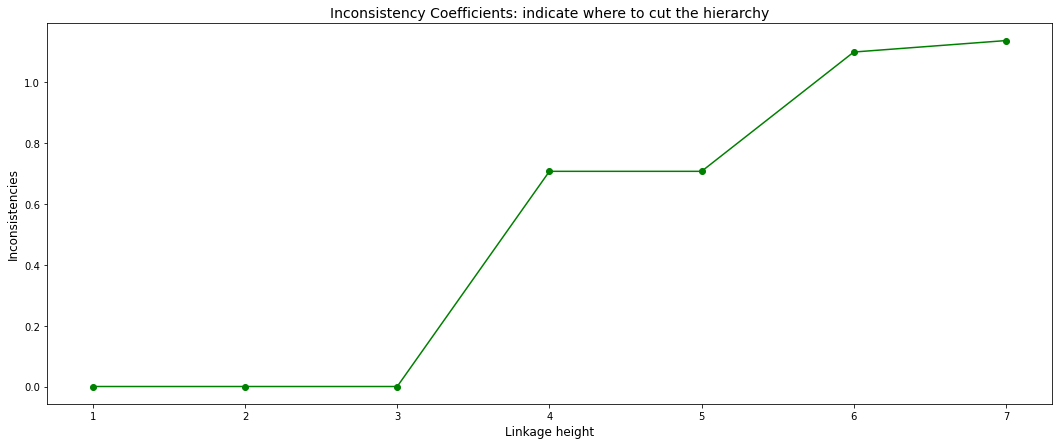

elapsed time for distance_based_clustering: 0.01 minutes
Aggregation mode for 2d_locationalEligibility set to bool as only binary values are acceptable for this variable
Aggregation mode for 1d_locationalEligibility set to bool as only binary values are acceptable for this variable


 c:\users\s.patil\documents\code\fine\FINE\spagat\representation.py:120: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
 c:\users\s.patil\documents\code\fine\FINE\utils.py:1022: UserWarning:Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
 c:\users\s.patil\documents\code\fine\FINE\utils.py:1022: UserWarning:Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
 c:\users\s.patil\documents\code\fine\FINE\utils.py:1022: UserWarning:Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
 c:

elapsed time for save_sds: 0.01 minutes


In [8]:
esM.aggregateSpatially(shapefilePath=SHAPEFILE_PATH, 
                        grouping_mode='distance_based', 
                        nRegionsForRepresentation=2,
                        aggregatedResultsPath='C:/Users/s.patil/Documents/code/fine/test/spagat/data/input')

In [10]:
xr.open_dataset('C:/Users/s.patil/Documents/code/fine/test/spagat/data/input/sds_xr_dataset.nc4')

<xarray.Dataset>
Dimensions:                       (Period: 1, TimeStep: 8760, component: 24, space: 2, space_2: 2)
Coordinates:
  * component                     (component) object 'Conversion, CCGT plants...
  * Period                        (Period) int64 0
  * TimeStep                      (TimeStep) int64 0 1 2 3 ... 8757 8758 8759
  * space                         (space) object 'cluster_1_cluster_2_cluster...
  * space_2                       (space_2) object 'cluster_1_cluster_2_clust...
Data variables:
    ts_operationRateMax           (component, Period, TimeStep, space) float64 ...
    ts_operationRateFix           (component, Period, TimeStep, space) float64 ...
    ts_commodityCostTimeSeries    (component, Period, TimeStep, space) float64 ...
    2d_locationalEligibility      (component, space, space_2) float64 ...
    2d_capacityMax                (component, space, space_2) float64 ...
    2d_investPerCapacity          (component, space, space_2) float64 ...
    2d_investIfBuilt              (component, space, space_2) float64 ...
    2d_opexPerOperation           (component, space, space_2) float64 ...
    2d_opexPerCapacity            (component, space, space_2) float64 ...
    2d_opexIfBuilt                (component, space, space_2) float64 ...
    2d_QPcostScale                (component, space, space_2) float64 ...
    2d_interestRate               (component, space, space_2) float64 ...
    2d_economicLifetime           (component, space, space_2) float64 ...
    2d_technicalLifetime          (component, space, space_2) float64 ...
    2d_capacityFix                (component, space, space_2) float64 ...
    2d_reactances                 (component, space, space_2) float64 ...
    2d_losses                     (component, space, space_2) float64 ...
    2d_distances                  (component, space, space_2) float64 ...
    1d_locationalEligibility      (component, space) float64 ...
    1d_capacityMax                (component, space) float64 ...
    1d_investPerCapacity          (component, space) float64 ...
    1d_investIfBuilt              (component, space) float64 ...
    1d_opexPerOperation           (component, space) float64 ...
    1d_commodityCost              (component, space) float64 ...
    1d_commodityRevenue           (component, space) float64 ...
    1d_opexPerCapacity            (component, space) float64 ...
    1d_opexIfBuilt                (component, space) float64 ...
    1d_QPcostScale                (component, space) float64 ...
    1d_interestRate               (component, space) float64 ...
    1d_economicLifetime           (component, space) float64 ...
    1d_technicalLifetime          (component, space) float64 ...
    1d_capacityFix                (component, space) float64 ...
    1d_opexPerChargeOperation     (component, space) float64 ...
    1d_opexPerDischargeOperation  (component, space) float64 ...

In [ ]:
#STEP 1. Read in the shapefile 
gdfRegions = gpd.read_file(shapefilePath)

In [ ]:
#STEP 2. Obtain xr dataset from esM 
sds = spd.SpagatDataset()
esm_dict, comp_dict = dictIO.exportToDict(esM)
sds.xr_dataset = xrio.dimensional_data_to_xarray_dataset(esm_dict, comp_dict)

In [ ]:
sds.xr_dataset

In [ ]:
#STEP 3. Add shapefile information to sds
sds.add_objects(description='gpd_geometries',
                dimension_list=['space'],
                object_list=gdfRegions.geometry)
spr.add_region_centroids(sds, spatial_dim='space')

In [ ]:
aggregation_dict = spg.distance_based_clustering(sds)

In [ ]:
aggregation_dict

In [ ]:
sub_to_sup_region_id_dict = aggregation_dict[nRegionsForRepresentation]

In [ ]:
aggregated_sds = spr.aggregate_based_on_sub_to_sup_region_id_dict(sds,
                                                                  sub_to_sup_region_id_dict)  

In [ ]:
aggregated_sds.xr_dataset

In [ ]:
new_esm_dict, new_comp_dict = xrio.update_dicts_based_on_xarray_dataset(esm_dict, 
                                                                        comp_dict, 
                                                                        xarray_dataset=aggregated_sds.xr_dataset)

In [ ]:
new_comp_dict

In [ ]:
sub_to_sup_region_id_dict = aggregation_dict[nRegionsForRepresentation]

In [ ]:
sub_to_sup_region_id_dict

In [ ]:
aggregation_function_dict= {'locationalEligibility': ('bool', None)}

In [ ]:
aggregation_function_dict = {f"{dimension}_{key}": value      #NOTE: xarray dataset has prefix 1d_ and 2d_. Therefore, in order to match that,the prefix is added here for each variable  
                                        for key, value in aggregation_function_dict.items()
                                            for dimension in ["1d", "2d"]}

In [ ]:
aggregated_sds = spr.aggregate_based_on_sub_to_sup_region_id_dict(sds,
                                                                sub_to_sup_region_id_dict,
                                                                aggregation_function_dict)

In [ ]:
aggregated_sds.xr_dataset

In [ ]:
new_esm_dict, new_comp_dict = xrio.update_dicts_based_on_xarray_dataset(esm_dict, comp_dict, 
                                                                  xarray_dataset=aggregated_sds.xr_dataset)

In [ ]:
new_esm_dict

In [ ]:
data = new_comp_dict['Source']['Wind (onshore)']['operationRateMax']

In [ ]:
data

In [ ]:
data.columns.get_level_values(1)

In [ ]:
data.columns = data.columns.droplevel()

In [ ]:
data

In [ ]:
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel()


In [ ]:
if isinstance(data.index, pd.MultiIndex):
    data.index = data.index.droplevel()

In [ ]:
data